## Essential Libraries


In [ ]:
!pip install scikit-dimension
!pip install umap-learn
!pip install --upgrade scikit-learn
!pip install --upgrade gap-stat
!pip install scikit-network
!pip install dask[complete] dask_ml
!pip install ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 41.3 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ce1bb78df9d868d93377a0c1ec792c5a52b8ad5349f3d22dffbe875bb0ddd6b1
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=41b633a2d1e7787d06abc5cdfb20dd65be3659dad3b7fb38dcba9f419a4054c7
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-py

## Loading Dataset from Google Drive

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('./drive')

Mounted at ./drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm.notebook import tqdm

In [ ]:
!cp 'drive/MyDrive/optimizer/data/R42.zip' R42.zip

In [ ]:
!unzip R42.zip

Archive:  R42.zip
  inflating: R42.txt                 


In [ ]:
!head R42.txt

50 192429 _ 68 150

6.22 37.06 12.65 37.75 28.17 9.07 18.86 10.38 20.77 20.54 16.20 1.19 2.67 19.76 0.98 14.44 24.72 26.19 21.54 37.75 11.88 39.07 32.42 27.88 -20.98 14.41 -8.38 -4.38 31.79 7.77 28.54 20.59 23.77 20.39 18.00 6.96 6.28 19.03 23.80 4.51 21.50 5.00 9.93 0.67 14.07 31.84 16.47 30.63 25.66 17.15
5.64 37.42 12.67 37.82 28.05 9.01 18.80 10.47 20.93 20.45 16.21 1.05 2.94 19.58 1.05 14.34 24.79 25.76 21.35 37.53 11.64 39.20 32.03 28.32 8.19 41.90 -6.62 12.51 30.58 15.34 36.38 25.00 32.57 21.63 22.97 4.37 7.68 18.72 20.33 6.11 22.82 8.05 13.77 1.89 16.24 31.74 17.96 29.70 25.70 17.92
5.74 37.61 12.76 37.73 28.04 9.14 18.80 10.37 20.80 20.67 16.03 1.19 2.86 19.85 0.87 14.15 24.73 26.52 21.95 38.85 12.41 38.96 33.66 26.12 -24.30 10.27 2.86 15.38 28.68 8.63 19.20 19.90 28.59 14.23 17.12 9.17 8.31 19.20 25.72 4.77 21.64 4.12 11.19 -0.18 13.43 31.53 16.40 30.01 26.52 17.63
6.20 37.17 12.62 37.89 28.18 9.04 18.89 10.32 20.79 20.59 16.07 1.06 2.74 19.80 0.27 14.29 25.21 29.46 24.38 47.

In [ ]:
with open('R42.txt') as fp:
  line = fp.readline()
  line = line.split(' ')
  d, n, k, p = [int(item) for item in line if item!='_']
  # line = fp.readline()
  # line = line.split(' ')
  # K = [int(item) for item in line]


In [ ]:
!tail -n +3 R42.txt > R42_clean.txt

In [ ]:
vectors = np.fromfile('R42_clean.txt', sep=' ').reshape(n, -1)

In [ ]:
vectors.shape

(192429, 50)

In [ ]:
from sklearn.neighbors import KDTree

def detect_outliers_knn(points):
  tree = KDTree(points)
  dists = []
  for point in tqdm(range(points.shape[0])):
    dist, ind = tree.query(points[point:point+1, :], k=8)
    dists.append((dist[0][1:].max(), ind[0][0]))
  return dists

outlier_ind = []
if p > 0:
  outlier_dists = sorted(detect_outliers_knn(vectors), key=lambda x: x[0])
  outlier_ind = [x[1] for x in outlier_dists[-p:]]

  0%|          | 0/192429 [00:00<?, ?it/s]

In [ ]:
outlier_ind

[8623,
 540,
 17556,
 10411,
 441,
 14410,
 1481,
 1967,
 5,
 449,
 18302,
 37368,
 8340,
 7477,
 1780,
 1344,
 41,
 3997,
 41384,
 900,
 586,
 3522,
 65289,
 5858,
 10037,
 16905,
 17643,
 7655,
 4269,
 10482,
 13590,
 4689,
 1408,
 14037,
 15,
 1604,
 357,
 1501,
 10045,
 690,
 1609,
 19743,
 1450,
 9785,
 18371,
 1310,
 753,
 7392,
 3094,
 761,
 740,
 1181,
 7044,
 50138,
 38886,
 1253,
 1283,
 8987,
 462,
 4627,
 7849,
 24142,
 187,
 8694,
 623,
 13874,
 570,
 17390,
 910,
 7994,
 21018,
 29208,
 25815,
 48554,
 1332,
 425,
 1713,
 3362,
 1924,
 1371,
 10521,
 1950,
 5346,
 1968,
 208,
 29146,
 10250,
 1279,
 19379,
 1319,
 8130,
 7177,
 1838,
 445,
 1928,
 997,
 13571,
 40528,
 906,
 6961,
 14873,
 13758,
 4323,
 656,
 1170,
 1749,
 2389,
 369,
 34511,
 453,
 3185,
 1243,
 20657,
 17606,
 618,
 486,
 12160,
 16583,
 34556,
 1071,
 24862,
 547,
 29131,
 1246,
 813,
 596,
 129,
 1335,
 1153,
 842,
 1007,
 34945,
 27860,
 9642,
 5226,
 12436,
 4531,
 10431,
 1292,
 6271,
 463,
 1432,

## Shuffling and Partitioning the dataset

In [ ]:
sample_size = 15000

np.random.seed(0)
pop = np.array(list(set(range(vectors.shape[0])) - set(outlier_ind)))
main_vectors_ind = list(np.random.choice(a=pop, replace=False, size=sample_size))
main_vectors = vectors[main_vectors_ind,:]

In [ ]:
main_vectors.shape

(15000, 25)

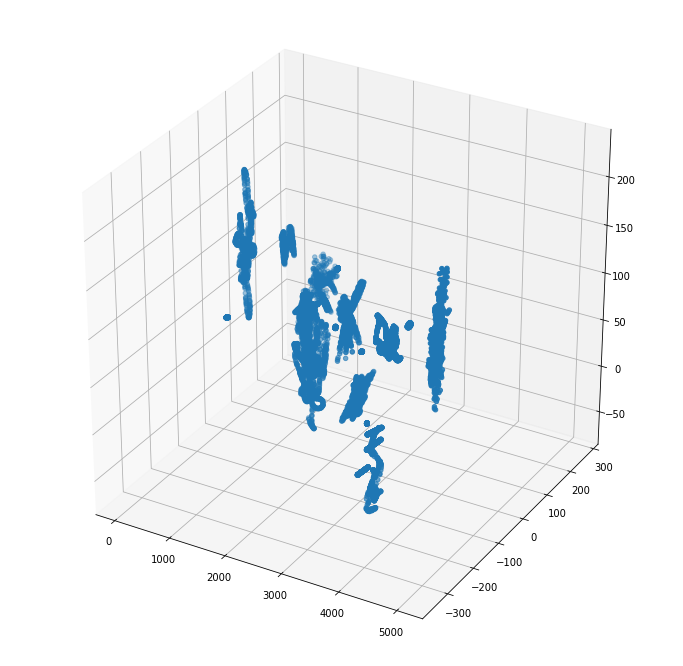

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2])
_ = plt.show()

In [ ]:
def manifold_sampler(X, n_samples, n_outliers=0):
  N = X.shape[0]
  k_n = int(N / n_samples) + 1
  W = np.zeros(N)
  # computing density of samples
  tree = KDTree(X)
  for point in tqdm(range(N)):
    dist, _ = tree.query(X[point:point+1], k=32)
    dist = dist[0][1:]
    W[point] = 1.0 / (1.0 + dist.mean())
  
  landmarks = np.random.choice(N, size=n_samples+n_outliers, replace=False)
  samples = []
  for point in tqdm(range(landmarks.shape[0])):
      l = landmarks[point]
      _, neighbors = tree.query(X[l:l+1], k=k_n)
      neighbors = neighbors[0]
      W_n = W[neighbors]
      W_n /= W_n.sum()
      selected = np.random.choice(neighbors, size=1, p=W_n)[0]
      samples.append(selected)
  samples = np.array(samples)
  return samples

In [ ]:
main_vectors_ind = manifold_sampler(vectors, 15000, p)
main_vectors_ind = main_vectors_ind[np.logical_not(np.isin(main_vectors_ind, np.array(outlier_ind)))]
main_vectors = vectors[main_vectors_ind]

  0%|          | 0/192429 [00:00<?, ?it/s]

  0%|          | 0/15150 [00:00<?, ?it/s]

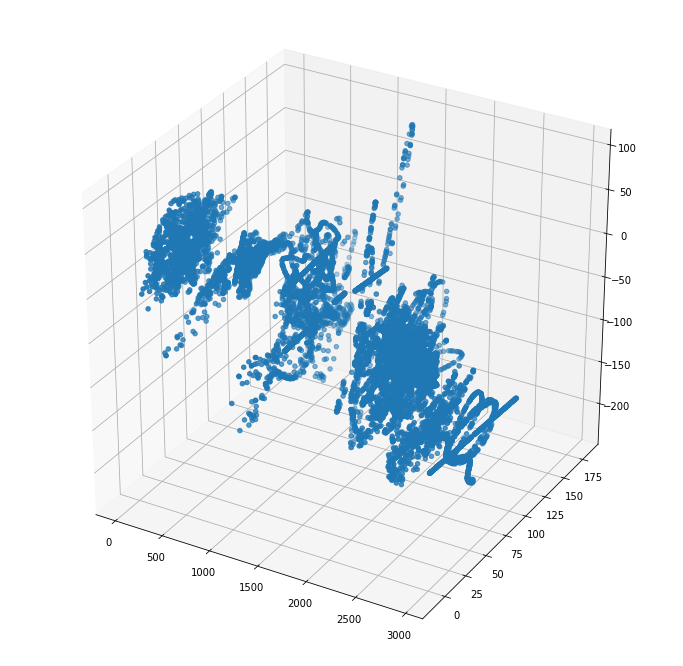

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2])
_ = plt.show()

In [ ]:
from sklearn.decomposition import PCA

reducer = PCA(n_components=2)
reduced = reducer.fit_transform(main_vectors)

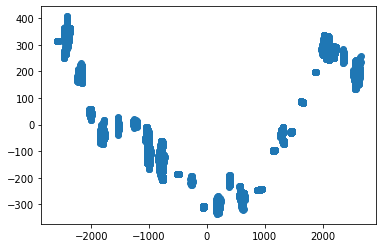

In [ ]:
_ = plt.scatter(reduced[:, 0], reduced[:, 1])

In [ ]:
from sknetwork.utils import KNNDense

knn_graph = KNNDense(n_neighbors=10).fit_transform(main_vectors)

In [ ]:
from sknetwork.clustering import Louvain

louvain = Louvain(resolution=0.00001)
labels = louvain.fit_transform(knn_graph)

In [ ]:
len(np.unique(labels))

45

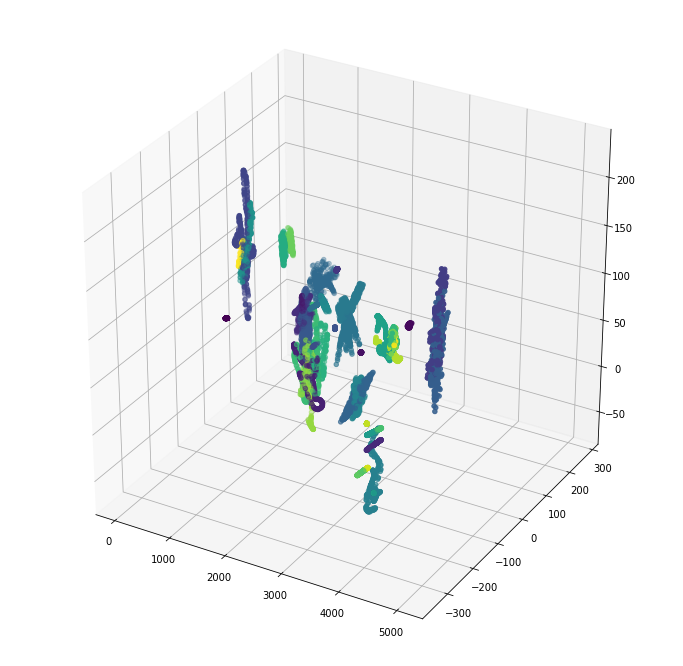

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2], c=labels)
_ = plt.show()

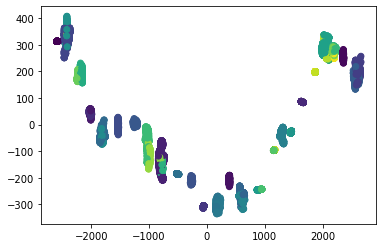

In [ ]:
_ = plt.scatter(reduced[:, 0], reduced[:, 1], c=labels)

In [ ]:
import scipy
from functools import lru_cache
from sklearn.covariance import ledoit_wolf
from numba import jit
from scipy.special import softmax

class SparseAffinity():
  def __init__(self, n_data):
    self.n = n_data
    self.storage = [{} for _ in range(self.n)]
  
  def add(self, i, j):
    if j > i:
      i, j = j, i
    
    if not (j in self.storage[i]):
      self.storage[i][j] = 1.0
    else:
      self.storage[i][j] += 1.0
  
  def sparse(self):
    data = []
    row_index = []
    col_index = []

    for i in range(self.n):
      for j,v in self.storage[i].items():
        row_index.append(i)
        col_index.append(j)
        data.append(v)
    
    S = scipy.sparse.csr_matrix((data, (row_index, col_index)),shape=(self.n, self.n))
    return S + S.T
        

class RandomWalkAffinity():  
  def __init__(self, X, tree, path_length):
    self.X = X
    self.tree = tree
    self.path_length = path_length
    self.matrix = SparseAffinity(X.shape[0])

  def get_neighbors(self, point, return_dist=False, drop_first=False, k=16):
    dists, neighbors = self.tree.query(self.X[point:point+1], k=k)
    s = 0
    if drop_first:
      s = 1
    neighbors = neighbors[0][s:]
    dists = dists[0][s:]
    
    if return_dist:
      return neighbors, dists

    return neighbors

  @lru_cache(maxsize=15000)
  def local_cov(self, point):
    neighbors = self.get_neighbors(point, k=64)
    # cov = ledoit_wolf(self.X[neighbors, :])[0]
    cov = np.cov(self.X[neighbors, :])
    return cov

  def cov_sim(self, a, b):
    if a == b:
      return 1.0

    cov_a = self.local_cov(a)
    cov_b = self.local_cov(b)
    dist =  np.linalg.norm(cov_a - cov_b, ord='nuc')
    return 1.0 / (1.0 + dist)
  
  def next_point(self, point, get_probs=False):
    neighbors, dists = self.get_neighbors(point, k=64,
                                          return_dist=True, drop_first=True)
    cov_sim = []
    for n in neighbors:
      cov_sim.append(self.cov_sim(point, n))
    cov_sim = np.array(cov_sim)
    cov_sim /= cov_sim.sum()

    dists = 1.0 / (1 + dists)
    dists /= dists.sum()

    probs = dists * softmax(cov_sim)
    probs /= probs.sum()

    if get_probs:
      return neighbors, probs

    next_point = np.random.choice(neighbors, size=1, p=probs)[0]

    return next_point


  def sample_path(self, initial):
    N = self.X.shape[0]
    path = [initial]
    for hop in range(self.path_length):
      path.append(self.next_point(path[-1]))
    
    for i in range(self.path_length):
      self.matrix.add(path[i], path[i])
      for j in range(i):
        self.matrix.add(path[i], path[j])
  
  def simulate(self):
    N = self.X.shape[0]
    for point in tqdm(range(N)):
      self.sample_path(point)

  def get_transion_matrix(self):
    N = self.X.shape[0]
    matrix = np.zeros((N, N))

    for point in tqdm(range(N)):
      neighbors, probs = self.next_point(point, get_probs=True)
      for n in range(len(neighbors)):
        matrix[point, neighbors[n]] = probs[n]
        matrix[neighbors[n], point] = probs[n]
    
    return scipy.sparse.csr_matrix(matrix)


    

In [ ]:
ra = RandomWalkAffinity(main_vectors, KDTree(main_vectors), 12)

In [ ]:
#ra.simulate()

## Computing the eigenvectors of the similarity matrix

In [ ]:
probs_matrix = ra.get_transion_matrix()
# probs_matrix = ra.matrix.sparse()

  0%|          | 0/15145 [00:00<?, ?it/s]

In [ ]:
L = scipy.sparse.csgraph.laplacian(probs_matrix)

In [ ]:
L

<15145x15145 sparse matrix of type '<class 'numpy.float64'>'
	with 1173457 stored elements in COOrdinate format>

In [ ]:
# sparse eigen value
top_eigvals, top_eigvecs = scipy.sparse.linalg.eigsh(L, k=40, which='SM')

In [ ]:
top_eigvecs.shape

(15145, 40)

In [ ]:
m = 39

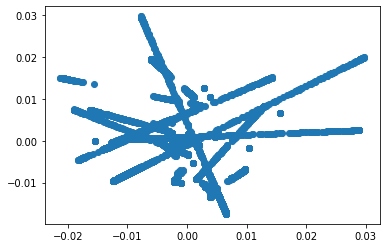

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
reduced_eig_vecs = pca.fit_transform(top_eigvecs[:, :39])

_ = plt.scatter(reduced_eig_vecs[:, 0], reduced_eig_vecs[:, 1])

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=m, covariance_type='full', n_init=2, random_state=0)
gmm.fit(top_eigvecs[:, :m])

GaussianMixture(n_components=39, n_init=2, random_state=0)

## Spectral Clustring Based on Random Walks

In [ ]:
labels = gmm.predict(top_eigvecs[:, :m])

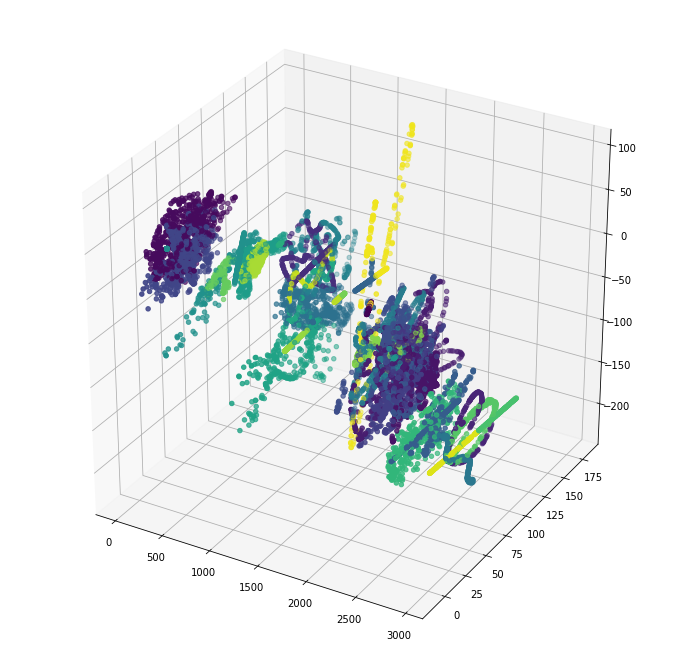

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(main_vectors[:, 0], main_vectors[:, 1], main_vectors[:, 2], c=labels)
_ = plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(main_vectors, labels)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
global_labels = clf.predict(vectors)

In [ ]:
global_labels[outlier_ind] = -1

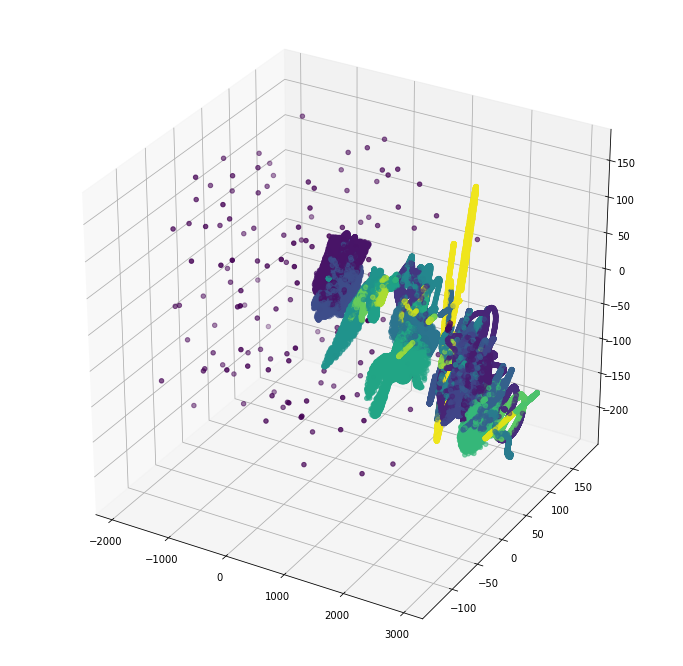

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], c=global_labels)
_ = plt.show()

In [ ]:
from gap_statistic import OptimalK
from sknetwork.clustering import Louvain
from sknetwork.utils import KNNDense


def estimate_n_clusters_louvain(s_vectors):
  knn_graph = KNNDense().fit_transform(s_vectors)
  louvain = Louvain(resolution=1.0)
  labels = louvain.fit_transform(knn_graph)
  return labels.max()


def estimate_n_clusters(s_vectors):
  s_local_tangent = get_local_tangent(s_vectors, n_neighbors=21)
  s_probs_matrix = adjusted_random_walk(s_vectors, s_local_tangent,
                                        n_neighbors=32, path_length=16, steps=2)

  s_L = sparse.csgraph.laplacian(s_probs_matrix)
  s_top_eigvals, s_top_eigvecs = sparse.linalg.eigsh(s_L, k=3, which='SM')

  optimalK = OptimalK(n_jobs=4, parallel_backend='joblib')
  n_clusters = optimalK(s_top_eigvecs, cluster_array=np.arange(1, 10))

  return n_clusters



manifolds_K = []

for manifold in range(m):
  s_vectors = vectors[global_labels==manifold]
  sub_manifold_size = s_vectors.shape[0]
  s_sample_size = min(sub_manifold_size, 5000)
  s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_vectors = s_vectors[s_sample_ind, :]
  n_clusters = estimate_n_clusters_louvain(s_vectors)
  print(f'Manifold {manifold} contains {n_clusters} sub-clusters.')
  manifolds_K.append(n_clusters)




Manifold 0 contains 49 sub-clusters.
Manifold 1 contains 50 sub-clusters.
Manifold 2 contains 62 sub-clusters.
Manifold 3 contains 99 sub-clusters.
Manifold 4 contains 39 sub-clusters.
Manifold 5 contains 87 sub-clusters.
Manifold 6 contains 49 sub-clusters.
Manifold 7 contains 91 sub-clusters.
Manifold 8 contains 56 sub-clusters.
Manifold 9 contains 86 sub-clusters.
Manifold 10 contains 130 sub-clusters.
Manifold 11 contains 75 sub-clusters.
Manifold 12 contains 46 sub-clusters.
Manifold 13 contains 18 sub-clusters.
Manifold 14 contains 55 sub-clusters.
Manifold 15 contains 47 sub-clusters.
Manifold 16 contains 73 sub-clusters.
Manifold 17 contains 114 sub-clusters.
Manifold 18 contains 16 sub-clusters.
Manifold 19 contains 34 sub-clusters.
Manifold 20 contains 15 sub-clusters.
Manifold 21 contains 51 sub-clusters.
Manifold 22 contains 50 sub-clusters.
Manifold 23 contains 59 sub-clusters.
Manifold 24 contains 16 sub-clusters.
Manifold 25 contains 19 sub-clusters.
Manifold 26 contains

In [ ]:
manifolds_K_w = 1.0 * np.array(manifolds_K)
manifolds_K_w /= manifolds_K_w.sum()
K = np.maximum(np.round(manifolds_K_w * (k-6)), 1).astype(int)

In [ ]:
k

68

In [ ]:
K.sum()

68

In [ ]:
import skdim.id as intd

manifold_dims = []

for manifold in tqdm(range(m)):
  s_vectors = vectors[global_labels==manifold]
  sub_manifold_size = s_vectors.shape[0]
  s_sample_size = min(sub_manifold_size, 3000)
  s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_vectors = s_vectors[s_sample_ind, :]
  lpca = intd.lPCA().fit_pw(s_vectors, n_neighbors = 256, n_jobs = 1)
  int_D = int(np.round(np.quantile(lpca.dimension_pw_, 0.2)))
  # int_D = int(np.round(lpca.dimension_pw_.mean()))
  print(f'Manifold {manifold} has dim {int_D}')
  manifold_dims.append(int_D)
  

  0%|          | 0/39 [00:00<?, ?it/s]

Manifold 0 has dim 2
Manifold 1 has dim 4
Manifold 2 has dim 4
Manifold 3 has dim 3
Manifold 4 has dim 3
Manifold 5 has dim 2
Manifold 6 has dim 3
Manifold 7 has dim 4
Manifold 8 has dim 4
Manifold 9 has dim 3
Manifold 10 has dim 3
Manifold 11 has dim 2
Manifold 12 has dim 1
Manifold 13 has dim 12
Manifold 14 has dim 4
Manifold 15 has dim 3
Manifold 16 has dim 4
Manifold 17 has dim 2
Manifold 18 has dim 12
Manifold 19 has dim 3
Manifold 20 has dim 12
Manifold 21 has dim 3
Manifold 22 has dim 1
Manifold 23 has dim 2
Manifold 24 has dim 12
Manifold 25 has dim 12
Manifold 26 has dim 2
Manifold 27 has dim 1
Manifold 28 has dim 2
Manifold 29 has dim 2
Manifold 30 has dim 1
Manifold 31 has dim 2
Manifold 32 has dim 1
Manifold 33 has dim 3
Manifold 34 has dim 1
Manifold 35 has dim 2
Manifold 36 has dim 1
Manifold 37 has dim 1
Manifold 38 has dim 2


In [ ]:
# for manifold in range(m):
#   if manifold_dims[manifold] > 10:
#     manifold_dims[manifold] = 10

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


class AffineManifold():
  def __init__(self, int_dim):
    self.int_dim = int_dim

  def fit(self, X):
    self.shift = X.mean(axis=0)
    XS = X - self.shift
    self.dim = X.shape[1] - self.int_dim
    self.pca = PCA()
    self.pca.fit(XS)
  
  def check(self, thresh=0.1):
    ev = self.pca.explained_variance_[-self.dim:].mean()
    if ev < thresh:
      return True
    return False
  
  def get_affine(self):
    a = self.pca.components_[-self.dim:]
    b = a @ self.shift
    a = a.T
    return a, b
    
class SphereManifold():
  def __init__(self, int_dim):
    self.int_dim = int_dim

  def fit(self, X):
    self.shift = X.mean(axis=0)
    self.dim = X.shape[1] - self.int_dim
    center, radius = self.noisy_center_radius(X, 5)
    self.center = center
    self.radius = radius
    error = np.abs(np.linalg.norm(X - center, axis=1) - radius)
    self.error_std = np.std(error)
    self.error_mean = np.mean(error)
    self.aff = AffineManifold(self.int_dim)
    self.aff.fit(X)

  def check(self, thresh=5.0):
    # print('std ', self.error_std)
    # print('mean', self.error_mean)
    # print('radius', self.radius)
    if (self.error_std < thresh) and (self.error_mean < 0.3*self.radius):
      return True
    return False

  def noisy_center_radius(self, points, k):
    dist_matrix = np.zeros((points.shape[0], points.shape[0]))
    for i in range(points.shape[0]):
      for j in range(i):
        dist = np.linalg.norm(points[i] - points[j])
        dist_matrix[i, j] = dist
    dist_matrix = dist_matrix.reshape(-1)
    top_k_dist = np.argsort(dist_matrix)[-k:]
    rows = top_k_dist // points.shape[0]
    cols = top_k_dist % points.shape[0]
    center = 0.5*(points[cols] + points[rows]).mean(axis=0)
    radius = dist_matrix[top_k_dist].mean()/2
    return center, radius
  
  def get_affine(self):
    return self.aff.get_affine()
  



def manifold_type(points, int_d):
  sph = SphereManifold(int_d)
  sph.fit(points)
  if sph.check():
    return 'Sphere', sph
  # test affinity
  aff = AffineManifold(int_d)
  aff.fit(points)
  if aff.check():
    return 'Affine', aff
  return 'Complex', None

manifolds_types = []
manifolds_specs = []

for manifold in range(m):
  s_vectors = vectors[global_labels==manifold]
  sub_manifold_size = s_vectors.shape[0]
  s_sample_size = min(sub_manifold_size, 1200)
  s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_vectors = s_vectors[s_sample_ind, :]
  mantype, spec = manifold_type(s_vectors, manifold_dims[manifold])
  print(f'Manifold {manifold} is {manifold_dims[manifold]}-{mantype}')
  manifolds_types.append(mantype)
  manifolds_specs.append(spec)

Manifold 0 is 2-Affine
Manifold 1 is 4-Complex
Manifold 2 is 4-Complex
Manifold 3 is 3-Complex
Manifold 4 is 3-Complex
Manifold 5 is 2-Complex
Manifold 6 is 3-Complex
Manifold 7 is 4-Complex
Manifold 8 is 4-Complex
Manifold 9 is 3-Complex
Manifold 10 is 3-Complex
Manifold 11 is 2-Complex
Manifold 12 is 1-Complex
Manifold 13 is 12-Sphere
Manifold 14 is 4-Complex
Manifold 15 is 3-Complex
Manifold 16 is 4-Complex
Manifold 17 is 2-Complex
Manifold 18 is 12-Sphere
Manifold 19 is 3-Complex
Manifold 20 is 12-Sphere
Manifold 21 is 3-Complex
Manifold 22 is 1-Complex
Manifold 23 is 2-Complex
Manifold 24 is 12-Sphere
Manifold 25 is 12-Sphere
Manifold 26 is 2-Affine
Manifold 27 is 1-Affine
Manifold 28 is 2-Complex
Manifold 29 is 2-Complex
Manifold 30 is 1-Affine
Manifold 31 is 2-Complex
Manifold 32 is 1-Sphere
Manifold 33 is 3-Complex
Manifold 34 is 1-Affine
Manifold 35 is 2-Complex
Manifold 36 is 1-Affine
Manifold 37 is 1-Complex
Manifold 38 is 2-Affine


In [ ]:
np.unique(global_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38])

In [ ]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine


sub_clusters = []
for sphere in tqdm(range(m)):
  points = vectors[global_labels==sphere]
  original_index = np.where(global_labels==sphere)[0]

  sub_manifold_size = points.shape[0]
  s_sample_size = min(sub_manifold_size, 3000)
  # s_sample_ind = np.random.choice(a=sub_manifold_size, replace=False, size=s_sample_size)
  s_sample_ind = manifold_sampler(points, s_sample_size)
  s_vectors = points[s_sample_ind, :]

  s_cluster = SpectralClustering(n_clusters=K[sphere], random_state=0, affinity='nearest_neighbors')
  s_cluster.fit(s_vectors)

  s_labels = s_cluster.labels_

  clf = KNeighborsClassifier(n_neighbors=1)
  clf.fit(s_vectors, s_labels)

  sub_manifold_labels = clf.predict(points)


  submanifold_clusters = []
  for subc in range(K[sphere]):
    submanifold_clusters.append(original_index[np.where(sub_manifold_labels == subc)])
  sub_clusters.append(submanifold_clusters)

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/3032 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/7906 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/12217 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/12926 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/5368 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/7723 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4178 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/11923 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/7372 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/7401 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/7230 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/7176 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3175 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4381 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/6080 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4326 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/10287 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4319 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3845 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/6028 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3767 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/4720 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/5162 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/1859 [00:00<?, ?it/s]

  0%|          | 0/1859 [00:00<?, ?it/s]

  0%|          | 0/4623 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3679 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3087 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/1919 [00:00<?, ?it/s]

  0%|          | 0/1919 [00:00<?, ?it/s]

  0%|          | 0/2806 [00:00<?, ?it/s]

  0%|          | 0/2806 [00:00<?, ?it/s]

  0%|          | 0/1910 [00:00<?, ?it/s]

  0%|          | 0/1910 [00:00<?, ?it/s]

  0%|          | 0/1151 [00:00<?, ?it/s]

  0%|          | 0/1151 [00:00<?, ?it/s]

  0%|          | 0/2437 [00:00<?, ?it/s]

  0%|          | 0/2437 [00:00<?, ?it/s]

  0%|          | 0/2210 [00:00<?, ?it/s]

  0%|          | 0/2210 [00:00<?, ?it/s]

  0%|          | 0/4720 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/2070 [00:00<?, ?it/s]

  0%|          | 0/2070 [00:00<?, ?it/s]

  0%|          | 0/1915 [00:00<?, ?it/s]

  0%|          | 0/1915 [00:00<?, ?it/s]

  0%|          | 0/2342 [00:00<?, ?it/s]

  0%|          | 0/2342 [00:00<?, ?it/s]

  0%|          | 0/3893 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

  0%|          | 0/1116 [00:00<?, ?it/s]

In [ ]:
with open('output_orange.txt', 'w+') as fp:
  fp.write(f'{n} {m}\n')
  for manifold in range(m):
    fp.write(f'{manifold_dims[manifold]} {K[manifold]} {manifolds_types[manifold]}\n')
    if manifolds_types[manifold] in ['Affine', 'Sphere']:
      if manifold_dims[manifold] == d:
        fp.write('\n')
      else:
        spec = manifolds_specs[manifold]
        affine_a, affine_b = spec.get_affine()
        for i in range(affine_a.shape[1]):
          fp.write(' '.join(affine_a[:, i].astype(str).tolist()) + '\n')
        fp.write(' '.join(affine_b.astype(str).tolist()) + '\n')
      if manifolds_types[manifold] == 'Sphere':
        fp.write(' '.join(spec.center.astype(str).tolist()) + f' {spec.radius} \n')
    for subc in range(K[manifold]):
      subc_points = sub_clusters[manifold][subc]
      fp.write(f'{len(subc_points)} ')
      fp.write(' '.join((subc_points+1).astype(str).tolist()))
      fp.write('\n')
  fp.write(f'{p}')
  if p > 0:
    fp.write(' ' + ' '.join((np.array(outlier_ind)+1).astype(str).tolist()))